In [17]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dem = rio.open('dem30m.tif')

In [14]:
dem.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 1777,
 'height': 1684,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:32611'),
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
        0.0, -29.999999999999723, 4229820.934460746)}

In [131]:
dem.transform

Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746)

In [10]:
elevation = dem.read(1)

In [13]:
elevation

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

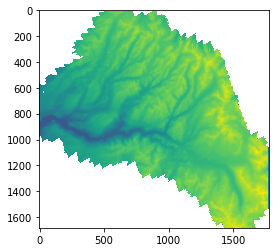

In [48]:
fig, ax = plt.subplots()
ax.imshow(elevation)

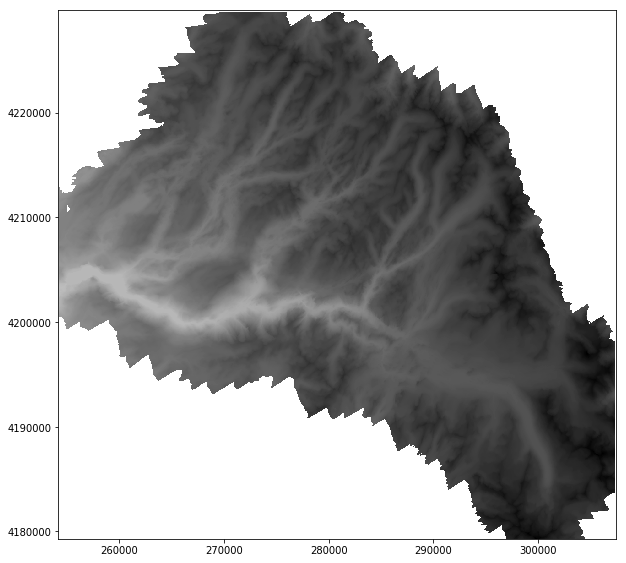

In [145]:
fig, ax = plt.subplots(figsize=(10,10))
rio.plot.show(dem, cmap='gray_r')

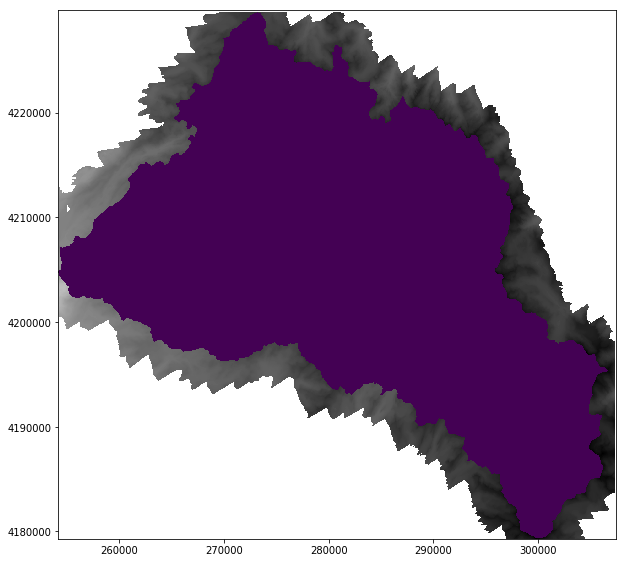

In [105]:
mask = rio.open('scene_30m_mask.tif')
fig, ax = plt.subplots(figsize=(10,10))
rio.plot.show(mask, ax=ax, zorder=1)
rio.plot.show(dem, cmap='gray_r', ax=ax, zorder=0)

In [144]:
mask_array = mask.read(1)
masked_elev = elevation * mask_array

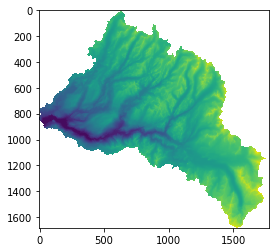

In [128]:
fig, ax = plt.subplots()
ax.imshow(masked_elev)

In [136]:
# Open and write to this new file
with rio.open('masked_dem30m.tif', 
              'w', 
              driver='GTiff',
              height=masked_elev.shape[0],
              width=masked_elev.shape[1],
              count=1, 
              dtype=masked_elev.dtype,
              nodata=-9999,
              crs=dem.crs, 
              transform=dem.transform) as dst:

    dst.write(masked_elev, 1)

In [138]:
masked_dem = rio.open('masked_dem30m.tif', 'r')

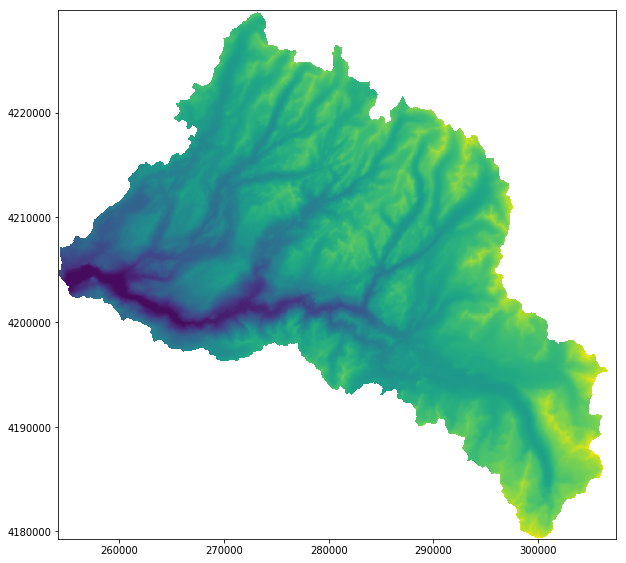

In [143]:
mask = rio.open('scene_30m_mask.tif')
fig, ax = plt.subplots(figsize=(10,10))
rio.plot.show(masked_dem)

In [52]:
geotiff = 'C:/Users/something.tif'

In [54]:
geotiff[:-4] + '_masked.tif'

'C:/Users/something_masked.tif'